## Регресия
### Генерация данных
Для демонстрации решения задачи регрессии при помощи решающего дерева сгенерируем данные, в которых есть один целевой признак и один нецелевой. В этом случае имеем дело с задачей одномерной регрессии и решением будет некоторая линия. В файле scikit-learn_regression_example.ipynb решалась задача линейной регресси, в которой решением служилая прямая линия. Мы же для разнообразия сгенерируем данные, в которых зависимость целевого признака от нецелевого будет носить нелинейный характер. Пусть зависимость будет параболической.

In [84]:
import numpy as np
import matplotlib.pyplot as plt

Функция `np.random.seed()` позволяет установить начальное состояние генератора случайных чисел, что позволяет получить одни и те же результаты при повторном запуске программы. Если вы используете модуль `np.random` без установки начального состояния, то каждый раз, когда вы запускаете программу, вы будете получать разные случайные числа.

Функция `np.random.rand()` создает массив заданной формы, содержащий случайные значения, равномерно распределенные между 0 и 1. Если не задать форму в аргументах функции, то вместо массива будет возвращено число. 

Функция `np.random.randn()` создает массив заданной формы, содержащий случайные значения, c нормальным распределеннием (среднее значение равно 0, стандартное отклонение равно 1). Если не задать форму в аргументах функции, то вместо массива будет возвращено число. 

In [85]:
# Quadratic training set + noise
def generate_data(n=200, random_state=None):
    np.random.seed(random_state)
    
    # генерация значений нецелевого признака
    X = np.random.rand(n, 1)    # n - число точек

    # генерация значений целевого признака
    y = 4 * (X - 0.5) ** 2

    # добавления шума
    y = y + np.random.randn(n, 1) / 10
    return X, y

X.shape = (200, 1), y.shape = (200, 1)


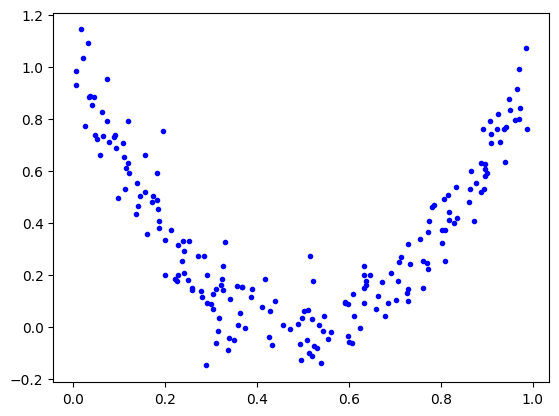

In [86]:
X, y = generate_data(random_state=42)

print(f"{X.shape = }, {y.shape = }")

plt.plot(X, y, "b.")
plt.show()

In [87]:
np.random.seed(None)
np.random.rand()

0.11691466710137632

## Обучение деревье различной глубины

In [88]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree1 = DecisionTreeRegressor(max_depth=1)
tree2 = DecisionTreeRegressor(max_depth=2)
tree1.fit(X, y)
tree2.fit(X, y)

DecisionTreeRegressor(max_depth=2)

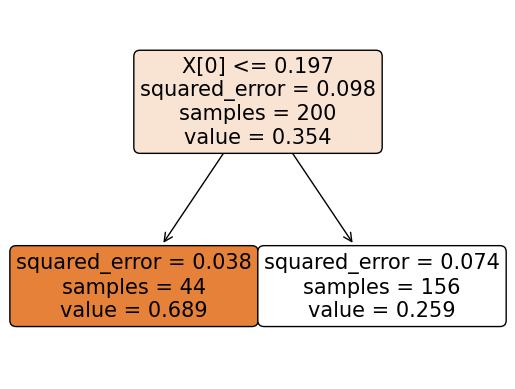

In [89]:
plot_tree(tree1, filled=True, rounded=True)
plt.show()

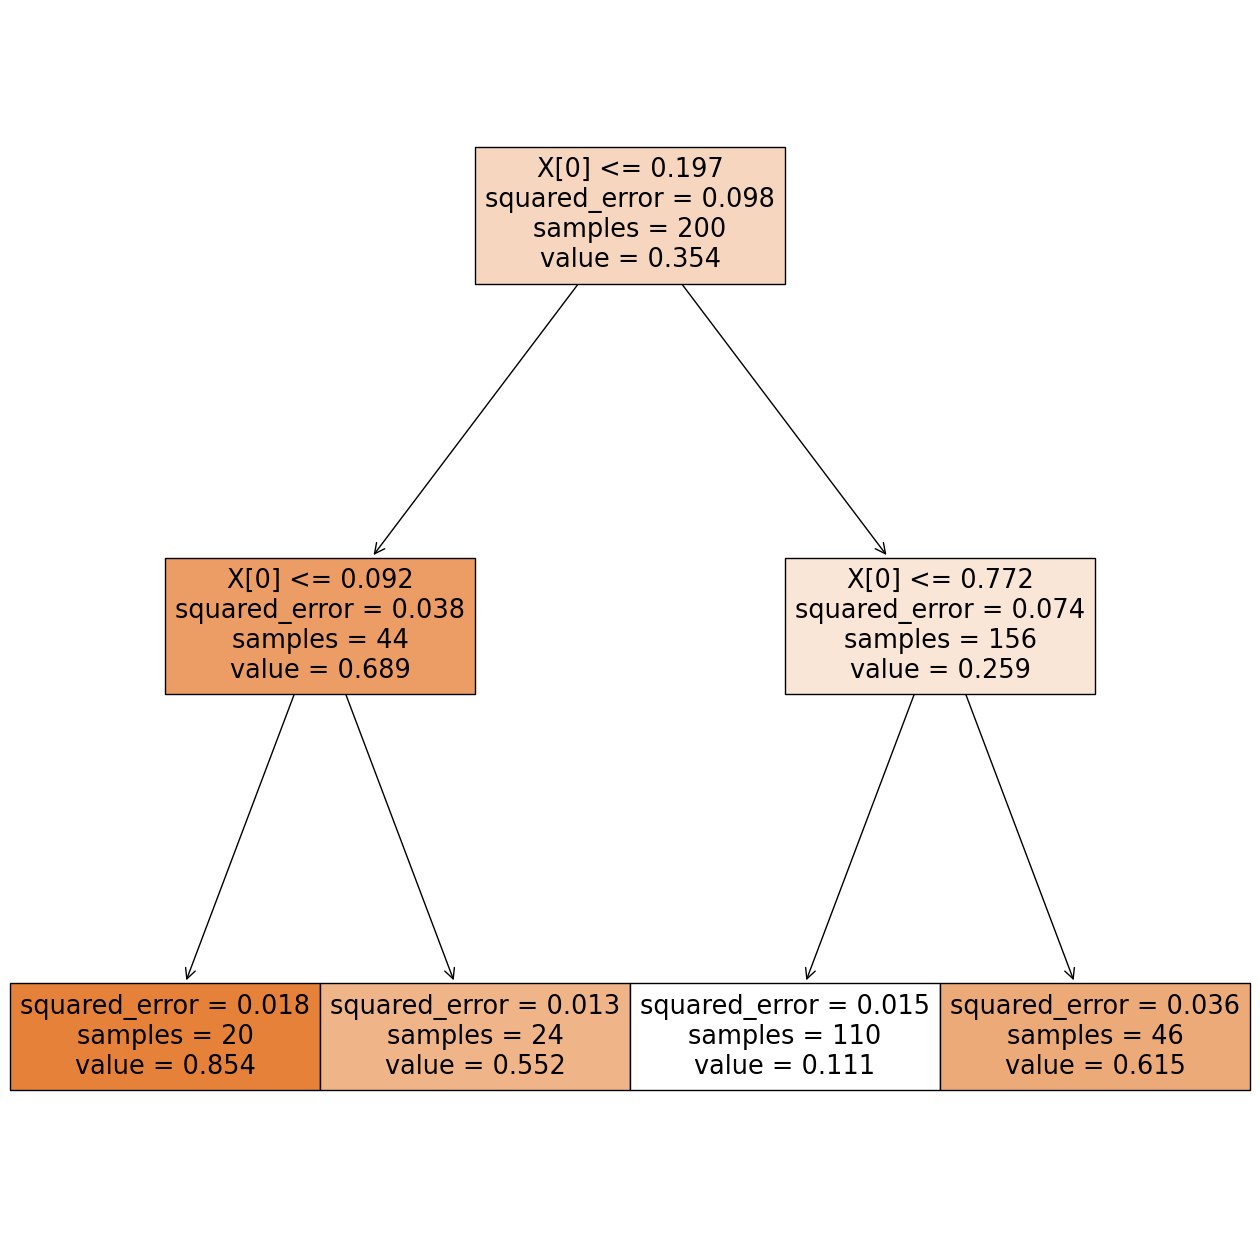

In [90]:
plt.figure(figsize=(16, 16))
plot_tree(tree2, filled=True)
plt.show()

#### Визуализация линии регрессии
Напишем функцию, которая будет визуализировать точки данных и решающую линию.

In [91]:
def plot_regression_predictions(model, X, y, axes=[0, 1, -0.2, 1.2]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = model.predict(x1)
    plt.axis(axes)
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$y$', fontsize=18, rotation=0)
    plt.plot(X, y, "b.")    
    plt.plot(x1, y_pred, "r.-", linewidth=2, label="$\hat y$")

Text(0, 0.5, '')

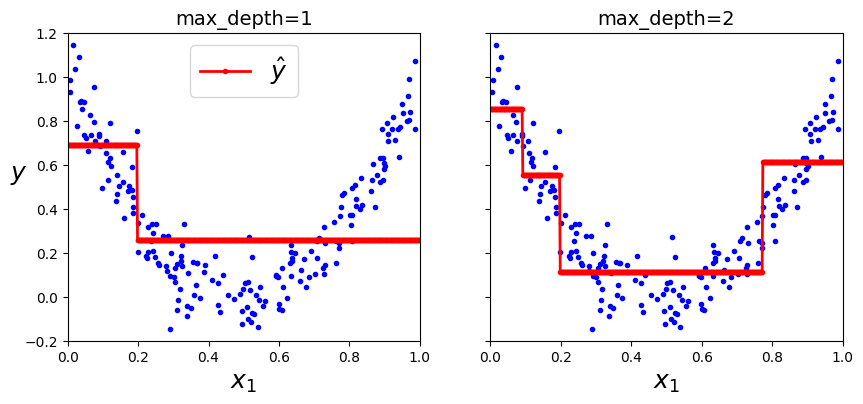

In [92]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
# первый рисунок
plt.sca(axes[0])
plot_regression_predictions(tree1, X, y)
plt.legend(loc='upper center', fontsize=18)
plt.title('max_depth=1', fontsize=14)
# второй рисунок
plt.sca(axes[1])
plot_regression_predictions(tree2, X, y)
plt.title('max_depth=2', fontsize=14)
plt.ylabel('')

Text(0, 0.5, '')

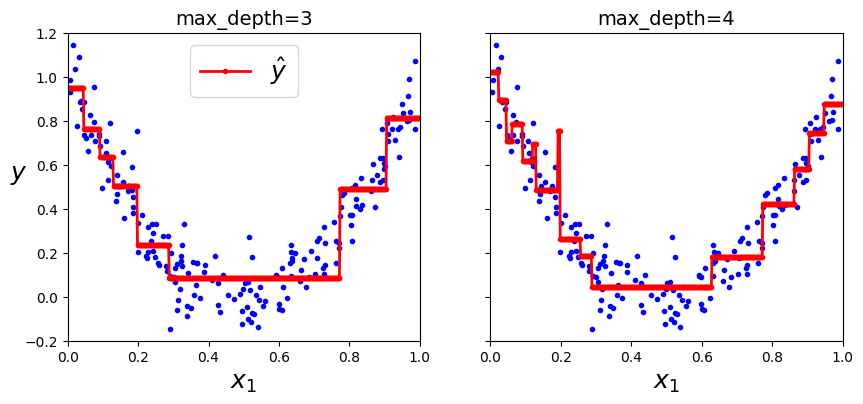

In [93]:
tree3 = DecisionTreeRegressor(max_depth=3)
tree4 = DecisionTreeRegressor(max_depth=4)
tree3.fit(X, y)
tree4.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
# первый рисунок
plt.sca(axes[0])
plot_regression_predictions(tree3, X, y)
plt.legend(loc='upper center', fontsize=18)
plt.title('max_depth=3', fontsize=14)
# второй рисунок
plt.sca(axes[1])
plot_regression_predictions(tree4, X, y)
plt.title('max_depth=4', fontsize=14)
plt.ylabel('')

In [94]:
tree5 = DecisionTreeRegressor(max_depth=5)
tree6 = DecisionTreeRegressor(max_depth=20)
tree5.fit(X, y)
tree6.fit(X, y)

DecisionTreeRegressor(max_depth=20)

Text(0, 0.5, '')

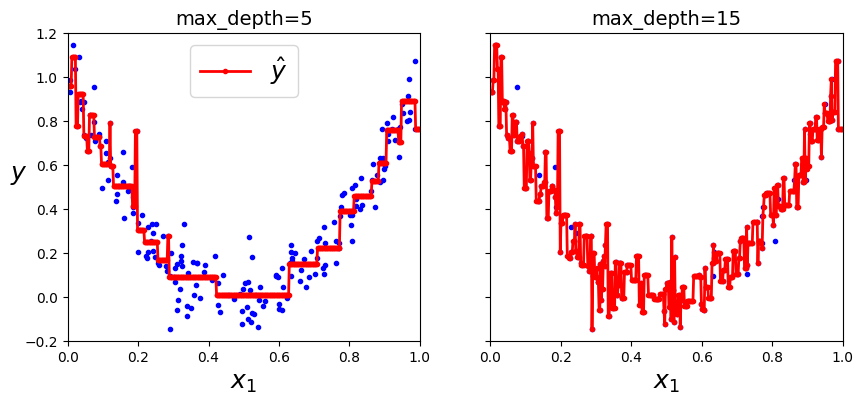

In [95]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
# первый рисунок
plt.sca(axes[0])
plot_regression_predictions(tree5, X, y)
plt.legend(loc='upper center', fontsize=18)
plt.title('max_depth=5', fontsize=14)
# второй рисунок
plt.sca(axes[1])
plot_regression_predictions(tree6, X, y)
plt.title('max_depth=15', fontsize=14)
plt.ylabel('')

In [96]:
tree6.get_depth()   # глубина

15

### Переобучение и регуляризация
Деревья решений почти не делают предположений о тренировочных данных (в отличие от, например, линейных моделей, которые предполагают, что данные являются линейными). Если не ставить ограничения, дерево подстраивается к данным как можно ближе, приводя к переобучению. Такие модели часто называются **непараметрическими моделями**, не от того, что в модели нет параметров (их может быть даже много), а от того, что число этих параметров заранее не определено, и структура модели может свободно прилегать к данным. В противоположность этому, **параметрические модели**, такие как линейные модели, имеют предопределенное число параметров, так что степень свободы ограничена, что снижает риск переобучения (хотя повышает риск недообучения).<br>


**Переобучение** (*overfitting*) - это проблема в машинном обучении, когда модель слишком точно подстраивается под тренировочные данные вместо того, чтобы находить общие закономерность, которая позволила бы прогнозировать результат на новых данных, которых она ранее не видела. При переобучении модель становится слишком сложной и начинает запоминать шум и случайности в тренировочных данных. Как результат, модель производит очень низкую ошибку на тренировочных данных, но плохо справляется с предсказанием на новых данных.

**Регуляризацией** называются методы, которые применяются для предотвращения переобучения, которые помогают ограничить сложность модели и улучшить ее обобщающую способность.

В случае с деревьями решений есть ряд регуляризирующих гиперпараметров, позволяющих избежать переобучение путем ограничения степеней свободы дерева решений. Регуляризующие гиперпараметры дерева решений зависят от алгоритма построения, но во всяком случае есть возможность ограничить глубину дерева гиперпараметром `max_depth` (по умолчанию стоит значение `None`, что означает неограниченность). <br>
Классы `DecisionTreeClassifier` и `DecisionTreeRegressor` имеет несколько других гиперпараметров, ограничивающих форму дерева:<br>

`min_samples_split` - минимальное число экземпляров в узле, необходимых для дальнейшего разбиения узла<br>
`min_weight_fraction_leaf` - минимальная доля образцов, которая должна находиться в каждом листе (если образцы имеют одианковый вес)<br>
`min_samples_leaf` - минимальное число образцов, допустимых в узле<br>
`max_leaf_nodes` - максимальное число листов<br>
`max_features` - максимальное число признаков, оцениваемых при разделении узла<br>
Увеличение **min** гиперпараметров и уменьшение **max** гиперпараметров регуляризирует модель.

Text(0, 0.5, '')

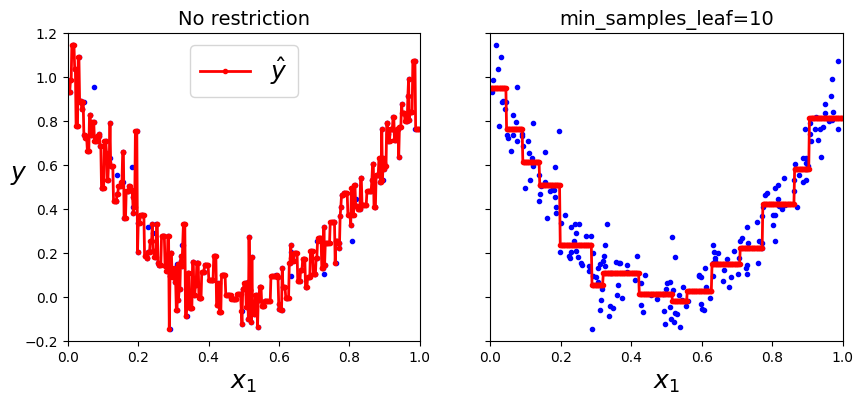

In [97]:
tree = DecisionTreeRegressor()  
tree_regular1 = DecisionTreeRegressor(min_samples_leaf=10)
tree.fit(X, y)
tree_regular1.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
# первый рисунок
plt.sca(axes[0])
plot_regression_predictions(tree, X, y)
plt.legend(loc='upper center', fontsize=18)
plt.title('No restriction', fontsize=14)
# второй рисунок
plt.sca(axes[1])
plot_regression_predictions(tree_regular1, X, y)
plt.title('min_samples_leaf=10', fontsize=14)
plt.ylabel('')

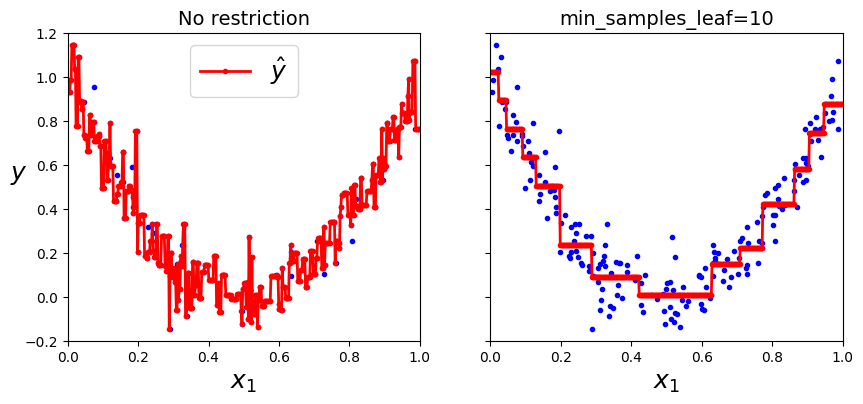

In [119]:
tree_regular2 = DecisionTreeRegressor(max_leaf_nodes=14,
                                       min_weight_fraction_leaf=0.01,
                                       )
                                       
tree_regular2.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
# первый рисунок
plt.sca(axes[0])
plot_regression_predictions(tree, X, y)
plt.legend(loc='upper center', fontsize=18)
plt.title('No restriction', fontsize=14)
# второй рисунок
plt.sca(axes[1])
plot_regression_predictions(tree_regular2, X, y)
plt.title('min_samples_leaf=10', fontsize=14)
plt.ylabel('')
plt.show()

Оценка среднеквадратического отклонения для регуляризованной и не регуляризовонной моделей на тренировочных и тестовых дынных

In [120]:
# сгенерируем тестовый набора данных
X_test, y_test = generate_data(n=200)

In [122]:
from sklearn.metrics import mean_squared_error

y_pred_train = tree.predict(X)
y_pred_test = tree.predict(X_test)

rmse_train = mean_squared_error(y_pred_train, y, squared=False)
rmse_test = mean_squared_error(y_pred_test, y_test, squared=False)

print(f"{rmse_train = }")
print(f"{rmse_test = }\n")


y_pred_train_regular2 = tree_regular2.predict(X)
y_pred_test_regular2 = tree_regular2.predict(X_test)

rmse_train_regular2 = mean_squared_error(y_pred_train_regular2, y, 
                                         squared=False)
rmse_test_regular2 = mean_squared_error(y_pred_test_regular2, y_test, 
                                        squared=False)

print(f"{rmse_train_regular2 = }")
print(f"{rmse_test_regular2 = }")

rmse_train = 0.0
rmse_test = 0.14339366541545087

rmse_train_regular2 = 0.08430644424458253
rmse_test_regular2 = 0.11445885217677801
